Задания для самостоятельного выполнения

1. Выведите результаты работы библиотечной модели - в численном виде и в графическом виде.
2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.
3. Модифицируйте код модели таким образом, чтобы фиктивный столбец единиц добавлялся к матрице признаков внутри класса.
4. Поэкспериментируйте с разными значениями параметра class_sep при генерации датасета. Визуализируйте полученные распределения. Сделайте вывод о том, как этот параметр влияет на точность получаемых моделей.
5. Сгенерируйте датасет с большим числом признаков и примените к нему созданную модель.
6. Сгенерируйте датасет с большим количеством классов и реализуйте в классе алгоритм "один против всех". Решите задачу множественной классификации средствами sklearn.
7. Выведите значения вероятностей для каждого объекта принадлежать тому или иному классу для библиотечной модели LogisticRegression.

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
from sklearn.datasets import make_classification
X,y = make_classification (n_samples=1000,
                        n_features=2,
                        n_informative=2,
                        n_redundant=0,
                        n_classes=2,
                        class_sep=2,
                        random_state=1)

In [28]:
pd.DataFrame(X).head()

,0,1
0,1.863411,0.087646
1,-1.530997,1.901182
2,-0.017224,-2.591112
3,-2.032039,-1.801162
4,4.620555,0.901124


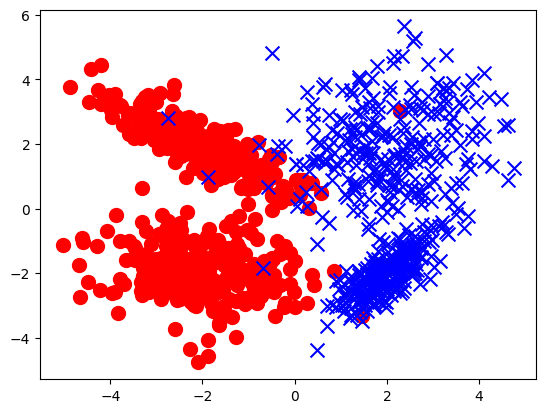

In [29]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)
plt.show()

In [30]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters
    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad
    def optimize(self, X, y, start_b, n_iters):
        b = start_b.copy()
        for i in range(n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
        return b
    def fit(self, X, y):
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)

In [31]:
class LogReg(SGD):
    def sigmoid(self, X, b):        
        return 1. / (1. + np.exp(-X.dot(b)))
    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
        return grad
    def predict_proba(self, X):
        return self.sigmoid(X, self.b)
    def predict(self, X):
        y_pred = self.predict_proba(X) > 0.5
        return y_pred

In [32]:
logreg = LogReg()

In [33]:
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])

In [34]:
logreg.fit(X, y)
y_pred = logreg.predict(X)

In [35]:
from sklearn.metrics import accuracy_score, f1_score

In [36]:
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')

accuracy = 0.98 F1-score = 0.98


In [24]:
y_pred_proba = logreg.predict_proba(X)

In [25]:
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01), 
    np.arange(X.min(axis=0)[2]-1, X.max(axis=0)[2]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
XX = np.array([(1, *xx) for xx in XX])

In [26]:
Z = logreg.predict_proba(XX)
Z = Z.reshape(xx.shape)

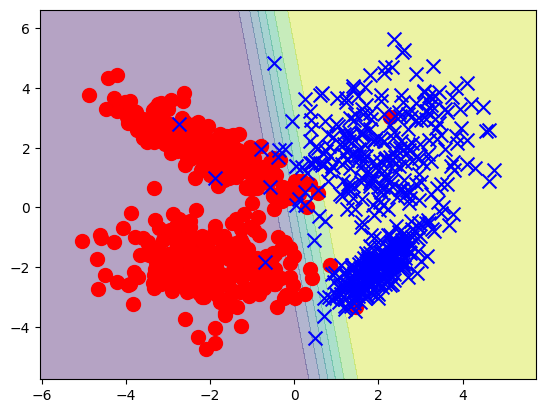

In [18]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100)

#### 1. Выведите результаты работы библиотечной модели - в численном и в графическом виде.

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
model = LogisticRegression()

In [10]:
model.fit(X, y)
y_pred_lr = model.predict(X)

In [11]:
model.score(X, y)

0.976

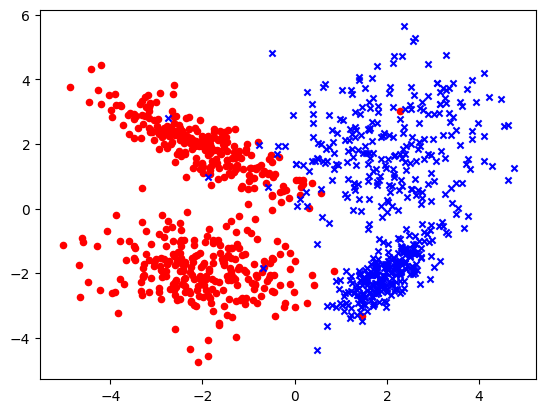

In [12]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=20)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=20)
plt.show()

#### 2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

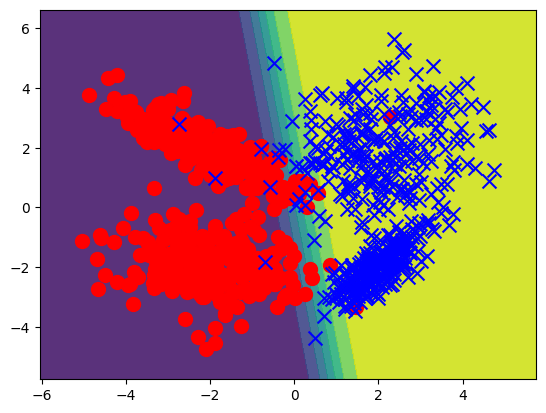

In [32]:
plt.contourf(xx, yy, Z, alpha=0.9)
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100)

#### 3. Модифицируйте код модели таким образом, чтобы фиктивный столбец единиц добавлялся к матрице признаков внутри класса.

Для добавления фиктивного столбца единиц к матрице признаков внутри класса LogReg, нужно модифицировать метод fit следующим образом:

In [33]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters
    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad
    def optimize(self, X, y, start_b, n_iters):
        b = start_b.copy()
        for i in range(n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
        return b
    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Добавление фиктивного столбца единиц к матрице признаков
        X = np.hstack([np.ones((n_samples, 1)), X])
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)

#### 4. Поэкспериментируйте с разными значениями параметра class_sep при генерации датасета. Визуализируйте полученные распределения. Сделайте вывод о том, как этот параметр влияет на точность получаемых моделей.

##### class_sep - меняем параметр на 1

In [20]:
from sklearn.datasets import make_classification
X,y = make_classification (n_samples=1000,
                        n_features=2,
                        n_informative=2,
                        n_redundant=0,
                        n_classes=2,
                        class_sep=1, # class_sep - меняем параметр
                        random_state=1)

In [21]:
pd.DataFrame(X).head()

,0,1
0,0.863411,-0.912354
1,-0.530997,0.901182
2,0.982776,-1.591112
3,-1.032039,-0.801162
4,3.620555,-0.098876


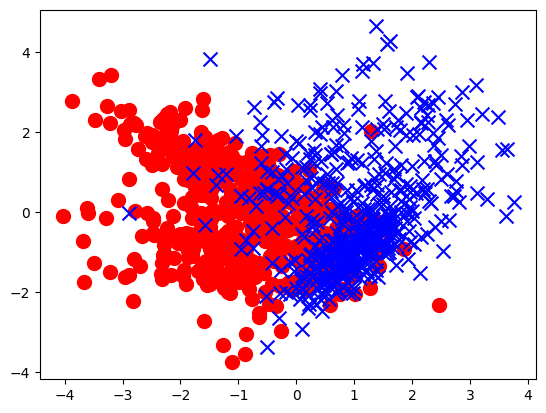

In [22]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)
plt.show()

##### class_sep - меняем параметр на 5

In [27]:
from sklearn.datasets import make_classification
X,y = make_classification (n_samples=1000,
                        n_features=2,
                        n_informative=2,
                        n_redundant=0,
                        n_classes=2,
                        class_sep=5, # class_sep - меняем параметр
                        random_state=1)

In [28]:
pd.DataFrame(X).head()

,0,1
0,4.863411,3.087646
1,-4.530997,4.901182
2,-3.017224,-5.591112
3,-5.032039,-4.801162
4,7.620555,3.901124


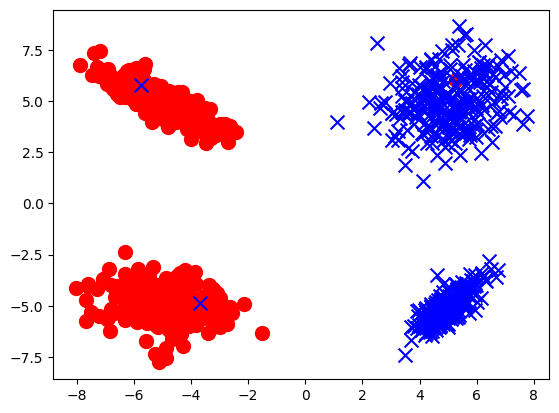

In [29]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)
plt.show()

##### class_sep - меняем параметр на 10

In [30]:
from sklearn.datasets import make_classification
X,y = make_classification (n_samples=1000,
                        n_features=2,
                        n_informative=2,
                        n_redundant=0,
                        n_classes=2,
                        class_sep=10, # class_sep - меняем параметр
                        random_state=1)

In [31]:
pd.DataFrame(X).head()

,0,1
0,9.863411,8.087646
1,-9.530997,9.901182
2,-8.017224,-10.591112
3,-10.032039,-9.801162
4,12.620555,8.901124


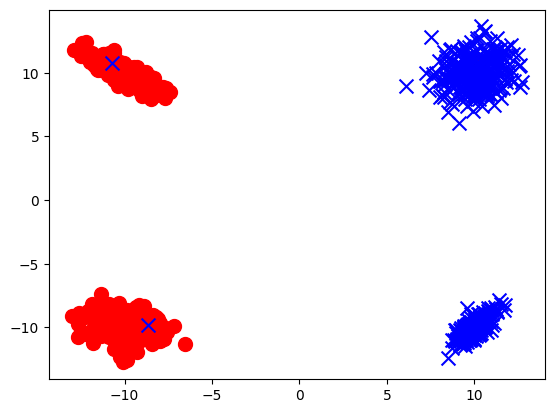

In [32]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)
plt.show()

#### 5. Сгенерируйте датасет с большим числом признаков и примените к нему созданную модель.

In [61]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000,
                        n_features=20,  # Увеличиваем число признаков
                        n_informative=15, 
                        n_redundant=5, 
                        n_classes=2, 
                        class_sep=2, 
                        random_state=1)

In [62]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.474755,1.401655,2.203956,1.889407,1.917045,-4.079506,5.399612,1.724643,-3.865636,-8.240501,-2.222099,0.530038,2.012227,-1.689936,-1.530006,11.240087,-1.098228,-7.270619,-3.212906,-4.139579
1,1.848025,1.818419,-3.369947,-2.315206,-0.850836,-2.810581,4.027528,-0.888002,-1.728644,-9.605129,-3.374929,3.776886,4.357332,5.769087,-2.028062,14.855030,-5.706428,2.627033,1.786620,-2.276816
2,-2.900412,0.430982,-1.239064,-1.583895,1.359125,-2.251286,0.143750,2.546021,5.521895,-2.215055,0.227937,2.208501,2.890260,-3.132713,-2.752718,5.553912,11.738799,2.693187,-3.286137,0.903450
3,-0.012404,-2.482081,-1.578408,3.103057,-1.672274,-2.254941,2.951717,-2.463761,-1.489665,3.782577,-3.458270,1.843014,0.886633,1.924460,-0.997302,12.057740,-1.901858,-1.743639,1.123589,-3.264182
4,0.810943,-4.512168,1.238417,0.620751,-0.640087,-3.542865,3.840213,-3.299910,-0.983051,1.683239,0.776891,-0.883850,2.690899,1.024902,2.813630,8.730935,-7.688261,-4.156495,4.095232,-1.767354


In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
model = LogisticRegression()

In [65]:
model.fit(X, y)
y_pred_lr = model.predict(X)

In [66]:
model.score(X, y)

0.99

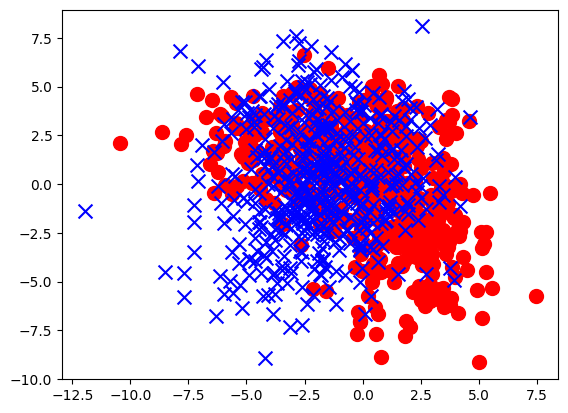

In [67]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)
plt.show()

#### 6. Сгенерируйте датасет с большим количеством классов и реализуйте в классе алгоритм "один против всех". Решите задачу множественной классификации средствами sklearn.

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [72]:
X, y = make_classification(n_samples=1000,
                        n_features=20,
                        n_informative=15,
                        n_redundant=5,
                        n_classes=5,  # Задаем количество классов
                        class_sep=2,
                        random_state=1)

In [73]:
# Разделение датасета на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# Реализация алгоритма "один против всех" с помощью LogisticRegression
models = {}
for cls in np.unique(y):
    binary_y = np.where(y_train == cls, 1, 0)
    model = LogisticRegression()
    model.fit(X_train, binary_y)
    models[cls] = model

In [75]:
# Предсказание классов для тестовой выборки
preds = np.zeros((X_test.shape[0], len(np.unique(y))), dtype=float)
for cls, model in models.items():
    preds[:, cls] = model.predict_proba(X_test)[:, 1]

In [76]:
predicted_classes = np.argmax(preds, axis=1)

In [77]:
# Оценка точности
accuracy = accuracy_score(y_test, predicted_classes)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.86


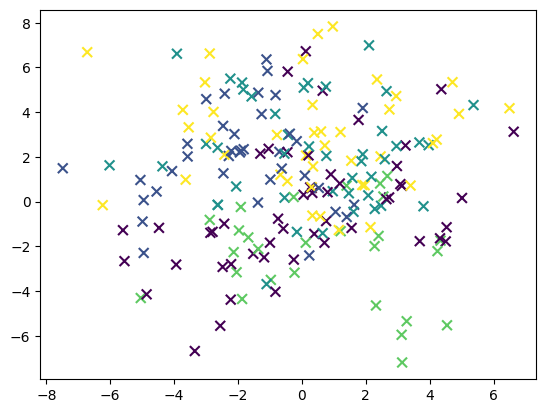

In [87]:
# Визуализация результатов 
plt.scatter(X_test[:, 0], X_test[:, 1], c=predicted_classes, marker='x', s=50)
plt.show()

#### 7. Выведите значения вероятностей для каждого объекта принадлежать тому или иному классу для библиотечной модели LogisticRegression.

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [91]:
# Генерация датасета с большим количеством классов
X, y = make_classification(n_samples=1000,
                        n_features=20,
                        n_informative=15,
                        n_redundant=5,
                        n_classes=5,  # Задаем количество классов
                        class_sep=2,
                        random_state=1)

In [92]:
# Разделение датасета на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
# Обучение модели LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [94]:
# Предсказание вероятностей принадлежности к каждому классу для тестовой выборки
proba = model.predict_proba(X_test)

In [95]:
# Вывод вероятностей для каждого объекта принадлежать тому или иному классу
print("Вероятности принадлежности к классам для тестовой выборки:")
print(proba)

Вероятности принадлежности к классам для тестовой выборки:
[[2.08121453e-02 3.94000131e-02 9.05719788e-03 8.94712721e-01
  3.60179228e-02]
 [5.15536603e-03 1.00520406e-02 1.65115323e-01 1.02659606e-02
  8.09411309e-01]
 [5.75889876e-02 4.80134036e-03 8.96867161e-01 3.81487510e-02
  2.59375974e-03]
 [9.91901634e-01 5.08322837e-04 2.59281787e-04 1.06244392e-03
  6.26831727e-03]
 [7.42187370e-07 9.98349581e-01 1.37403045e-05 1.50074842e-03
  1.35187818e-04]
 [6.67427219e-03 1.84233641e-02 5.37690173e-01 6.50929129e-05
  4.37147098e-01]
 [8.24830142e-04 9.79964324e-01 1.42778119e-03 1.33355413e-04
  1.76497089e-02]
 [9.89633657e-01 1.72329427e-03 2.02538576e-03 3.71361398e-04
  6.24630177e-03]
 [9.76915216e-04 2.51700687e-04 9.67993974e-01 3.07474456e-02
  2.99646219e-05]
 [5.17989040e-01 1.40250273e-02 4.49791559e-01 5.50172804e-03
  1.26926456e-02]
 [4.43701580e-04 4.56023551e-04 1.16992322e-01 2.71514201e-03
  8.79392811e-01]
 [2.68684870e-01 2.23859896e-01 5.07011982e-02 4.54539016e-01